Importing required libraries


In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 21.3 MB/s eta 0:00:0000:01


In [3]:
import os

In [4]:
import glob

In [24]:
from IPython.display import Image, display

In [6]:
from IPython import display

In [7]:
display.clear_output()

Checking access to GPU

In [8]:
!nvidia-smi

Sun Jan 12 16:14:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
Home = os.getcwd()

In [10]:
print(Home)

/kaggle/working


Check the installation of Yolov8

In [11]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


Importing the Kenya Sign Language dataset from Roboflow

In [12]:
!mkdir {Home}/datasets
%cd {Home}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xLxRGzFLK4o3WvaluLzH")
project = rf.workspace("finalproject-r7tzq").project("ksl_sign_language_detection")
version = project.version(1)
dataset = version.download("yolov8")



/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ksl_sign_language_detection-1 in yolov8:: 100%|██████████| 3756/3756 [00:00<00:00, 8067.11it/s]


In [13]:
%cd {Home}

/kaggle/working


In [14]:
%cd {dataset.location}

/kaggle/working/datasets/ksl_sign_language_detection-1


In [15]:
%cd {Home}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 235MB/s]
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/ksl_sign_language_detection-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

In [16]:
!ls {Home}/runs/detect/train/

args.yaml					  train_batch1.jpg
confusion_matrix_normalized.png			  train_batch2.jpg
confusion_matrix.png				  train_batch820.jpg
events.out.tfevents.1736698555.0b60a3f3d92f.97.0  train_batch821.jpg
F1_curve.png					  train_batch822.jpg
labels_correlogram.jpg				  val_batch0_labels.jpg
labels.jpg					  val_batch0_pred.jpg
P_curve.png					  val_batch1_labels.jpg
PR_curve.png					  val_batch1_pred.jpg
R_curve.png					  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


Display Confusion Matrix

/kaggle/working


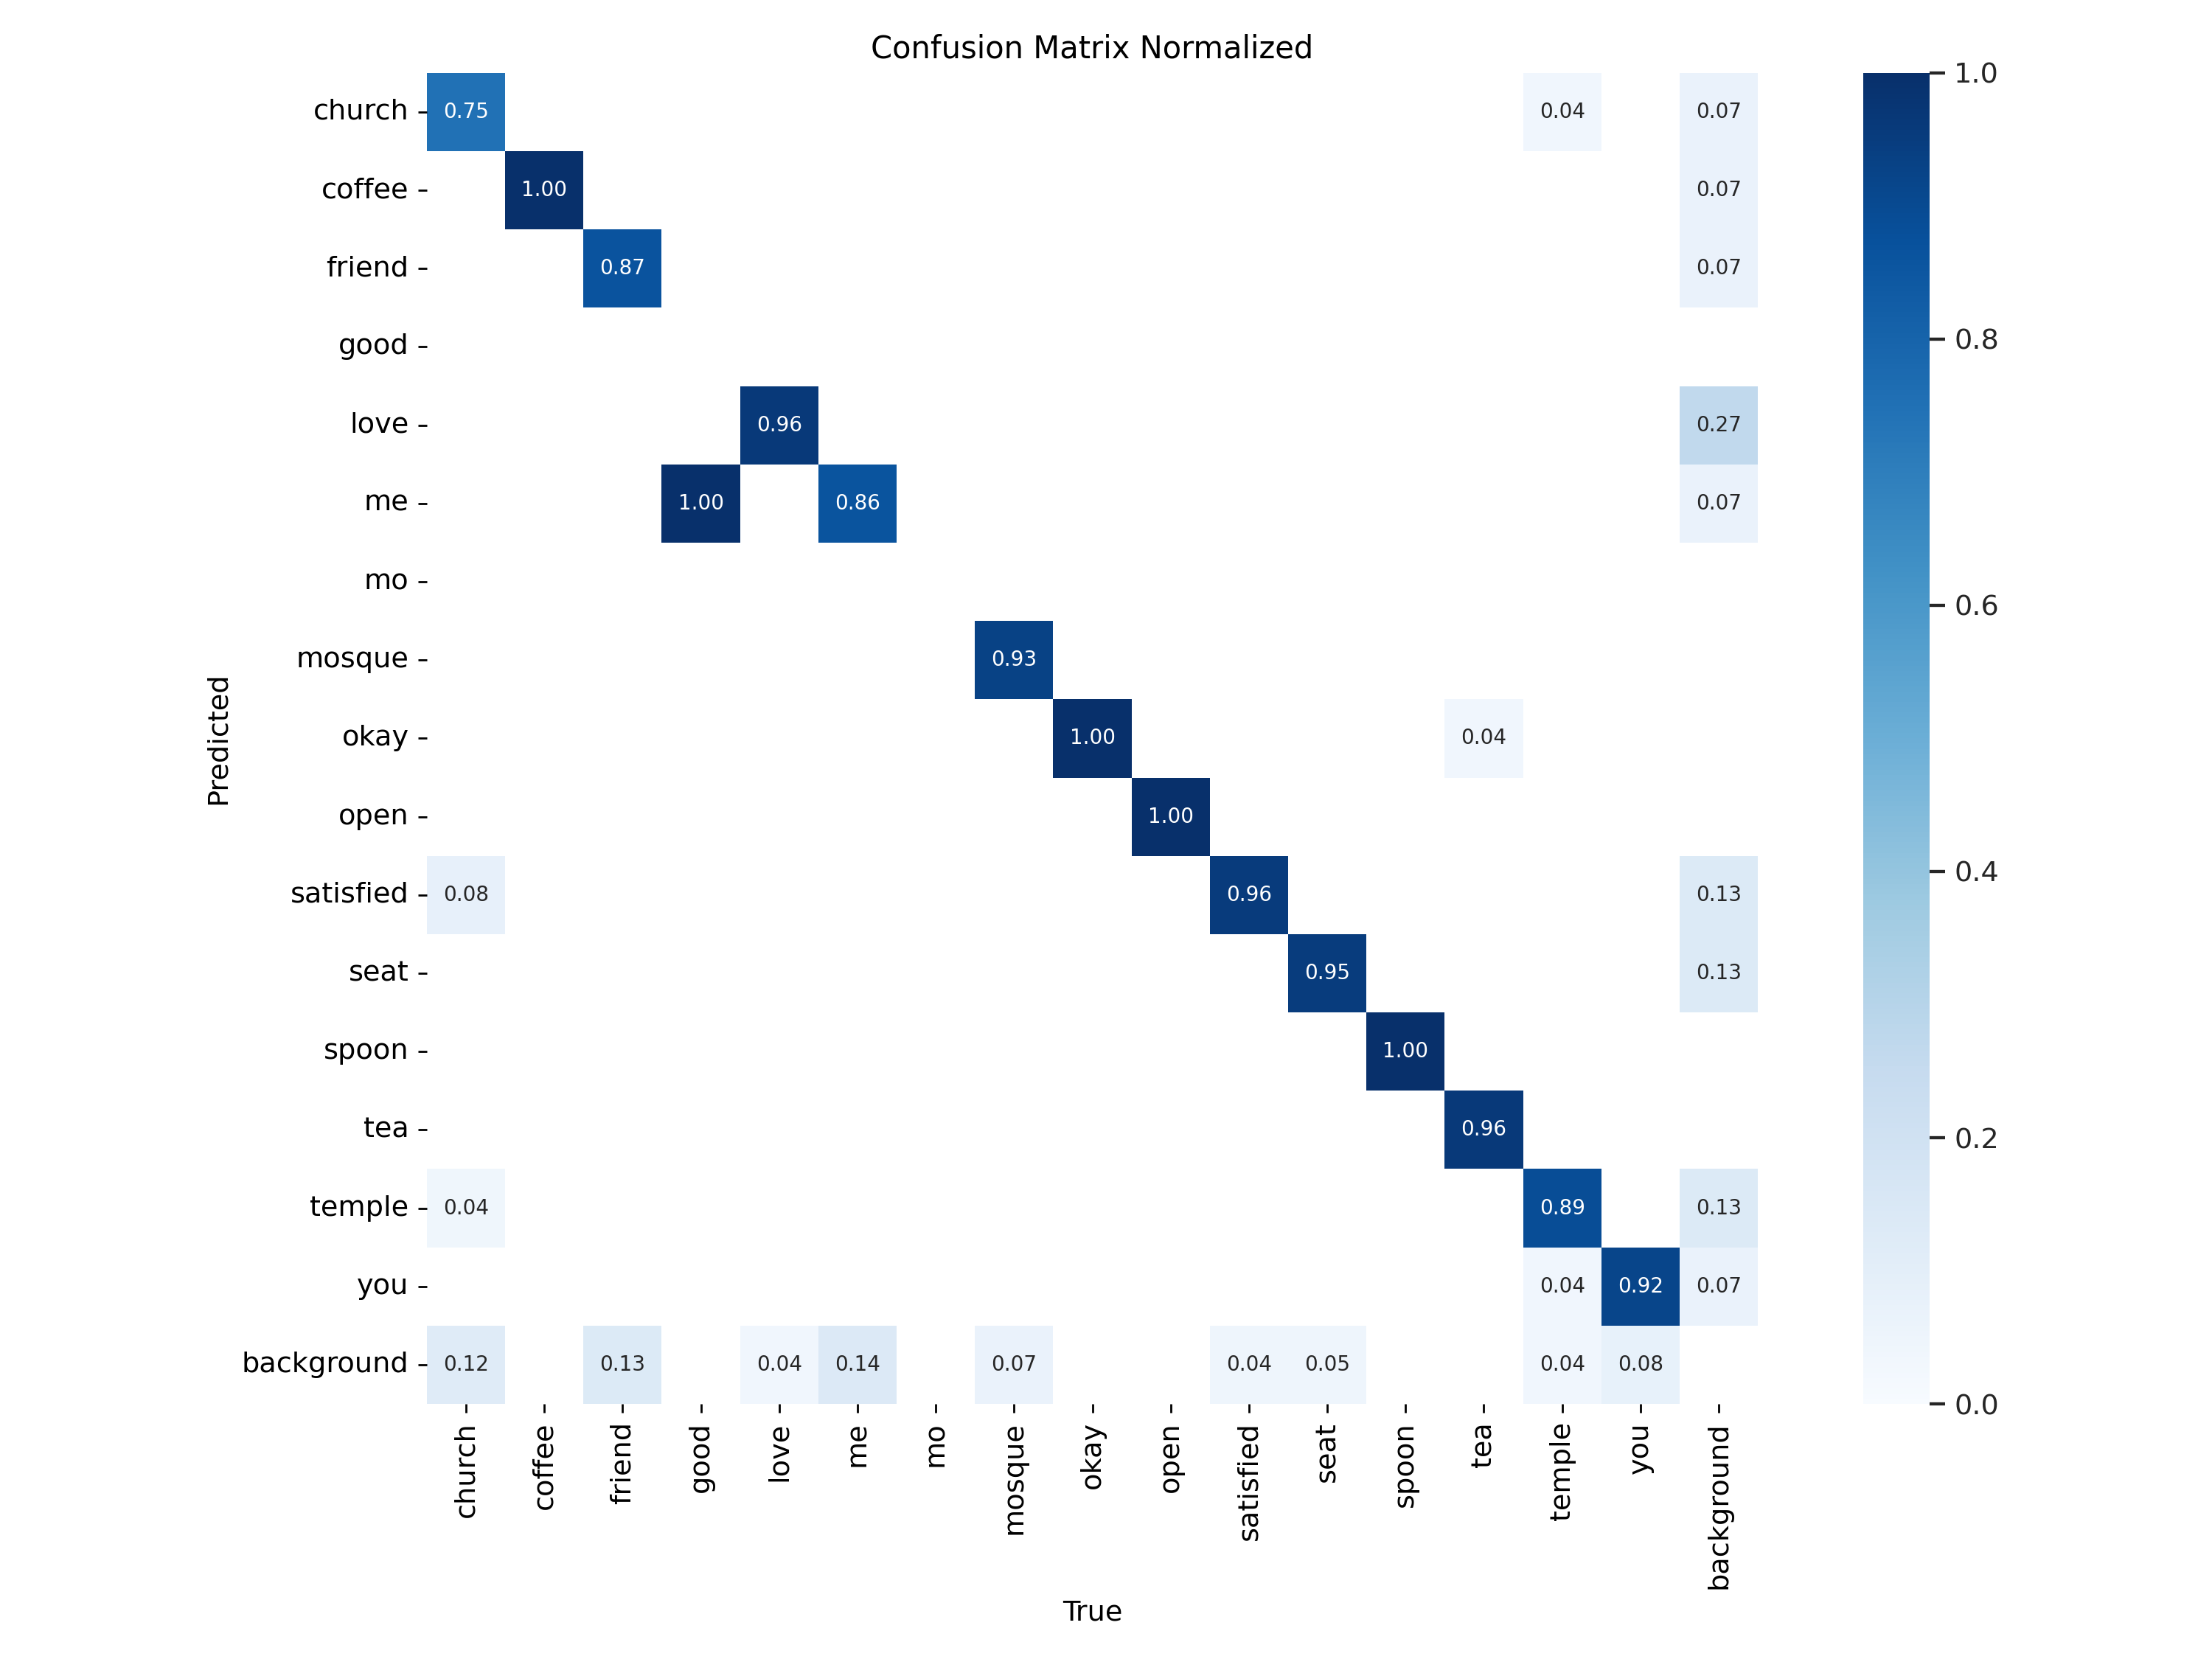

In [17]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train/confusion_matrix_normalized.png', width=800)


Training and Validation loss

/kaggle/working


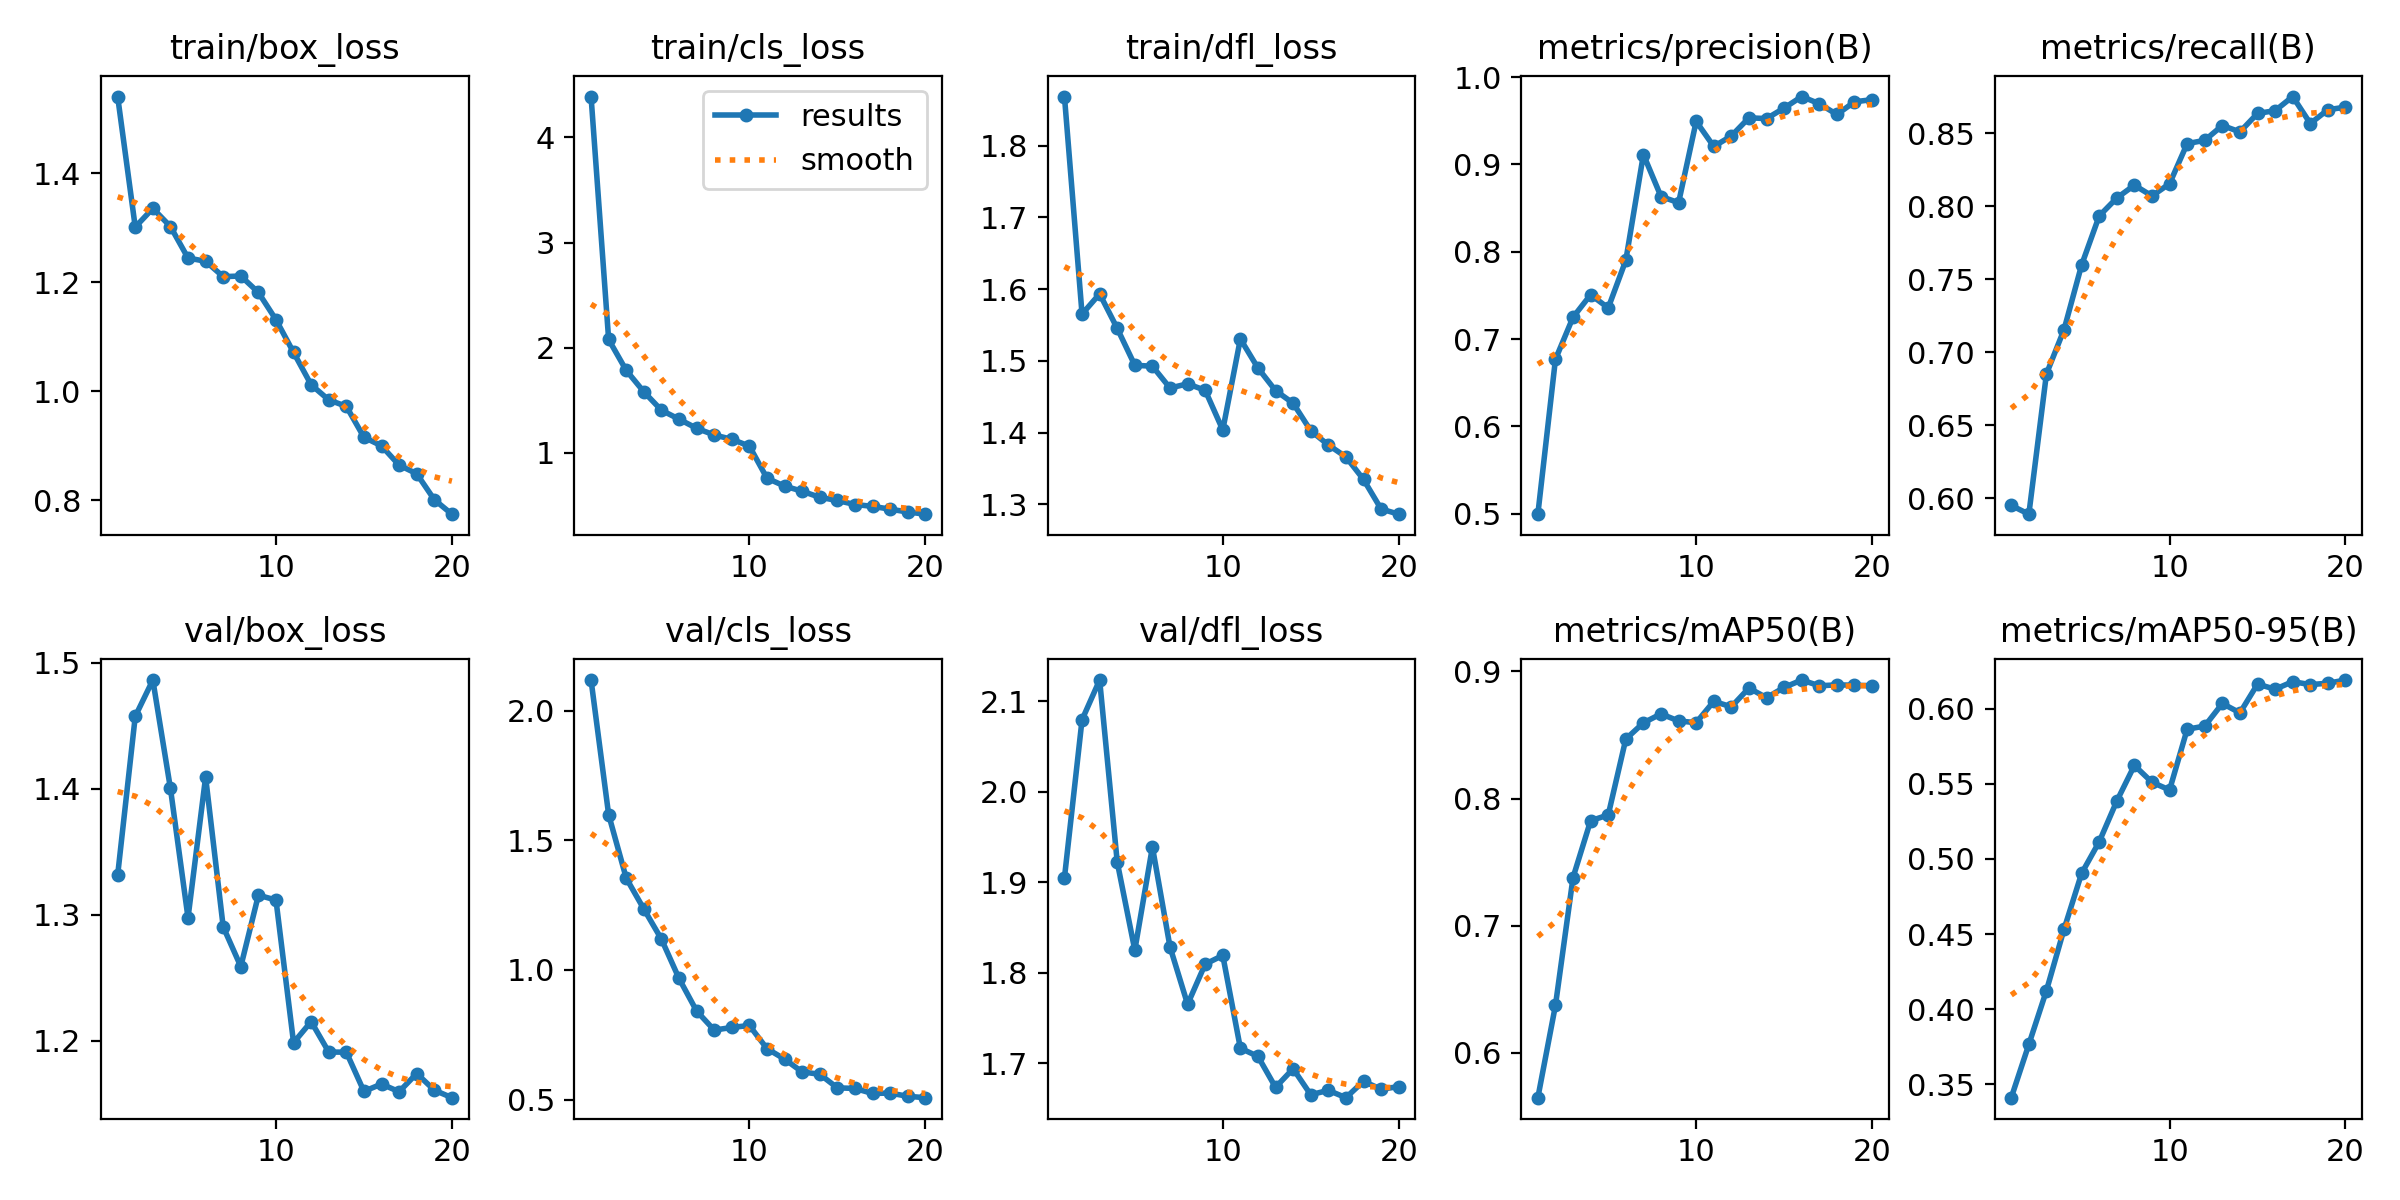

In [18]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train/results.png', width=800)

/kaggle/working


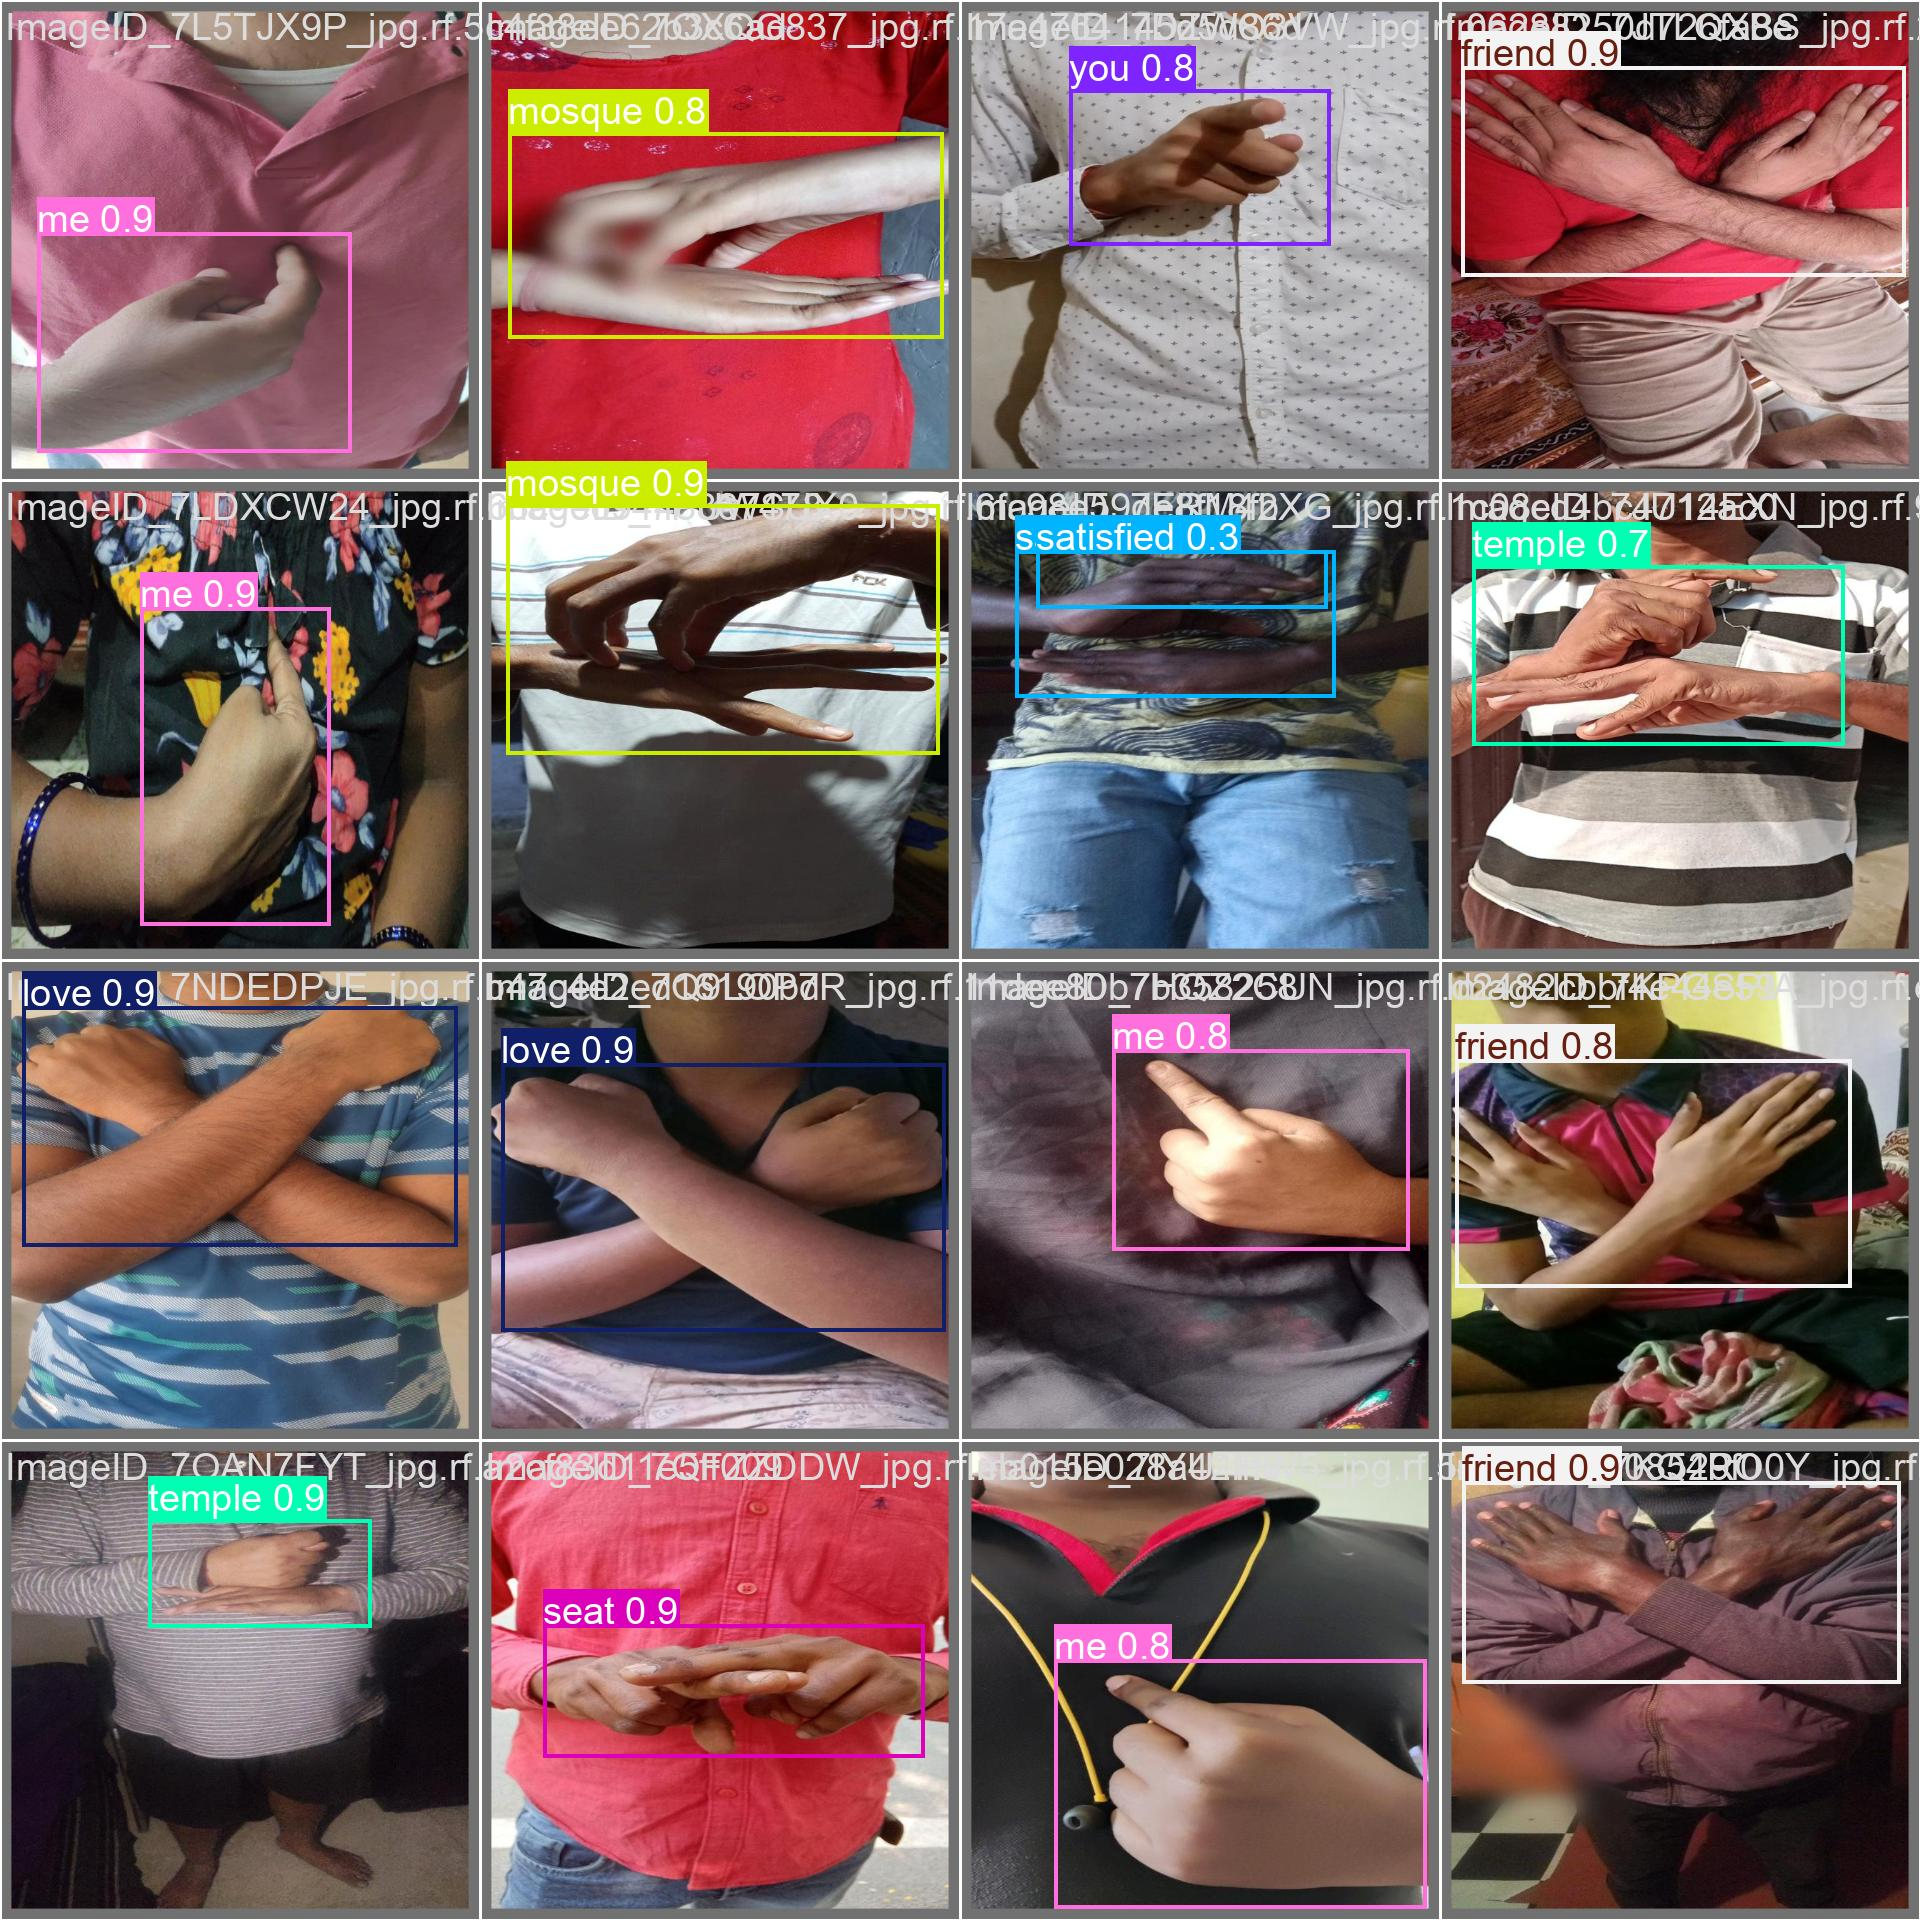

In [19]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train/val_batch0_pred.jpg', width=600)

Validating the model

In [20]:
%cd {Home}

!yolo task=detect mode=val model={Home}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/working/datasets/ksl_sign_language_detection-1/valid/label
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        374        391      0.974      0.868      0.889       0.62
                church         21         24          1      0.779      0.869      0.683
                coffee         15         15      0.933          1      0.995      0.766
                friend         26         30      0.992      0.867      0.886      0.603
                  good          1          1          1          0     0.0498     0.0298
                  love         27         27      0.992      0.963       0.99      0.667
                    me         33         36      0.935      0.799      0.832      0.509
                mosque

Inference of the model


In [21]:
%cd {Home}

!yolo task=detect mode=predict model={Home}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/kaggle/working
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs

image 1/187 /kaggle/working/datasets/ksl_sign_language_detection-1/test/images/20180624_235317_jpg.rf.7568cd66a56516cdf15270746dc3f63e.jpg: 640x640 1 coffee, 9.9ms
image 2/187 /kaggle/working/datasets/ksl_sign_language_detection-1/test/images/20180625_200009_jpg.rf.0d1e3d52da9f43e83df3ddf602fd15d5.jpg: 640x640 1 spoon, 8.5ms
image 3/187 /kaggle/working/datasets/ksl_sign_language_detection-1/test/images/20180625_201735_jpg.rf.75170e35809e572039ae682b4cec0dfb.jpg: 640x640 1 coffee, 9.1ms
image 4/187 /kaggle/working/datasets/ksl_sign_language_detection-1/test/images/20180625_220112_jpg.rf.885a0237016de475f45d269eb027f783.jpg: 640x640 1 spoon, 8.4ms
image 5/187 /kaggle/working/datasets/ksl_sign_language_detection-1/test/images/20180625_220203_jpg.rf.65e74e722db155d1b462298c5469bedb.jpg: 640x640 1 ok

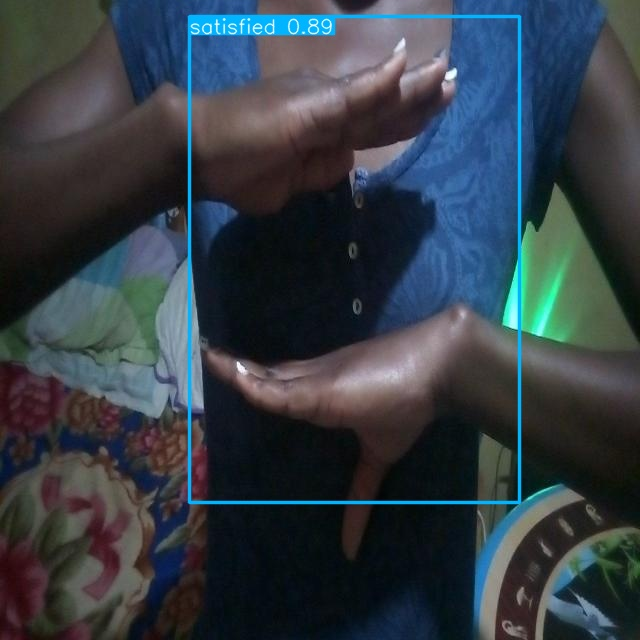

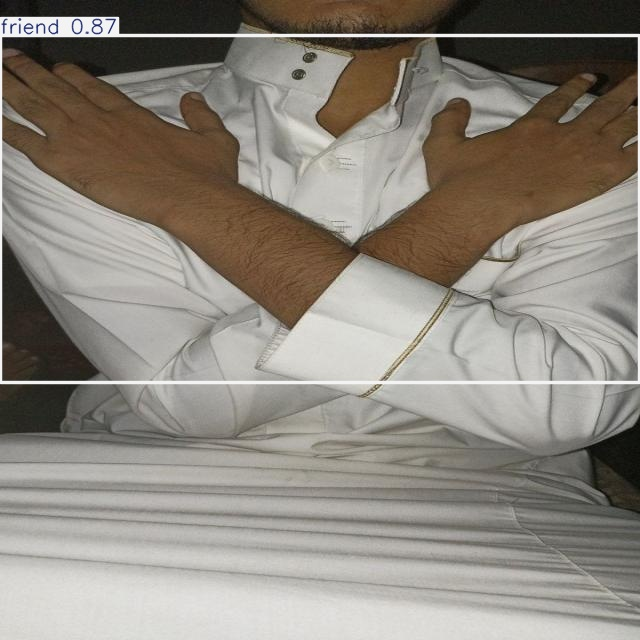

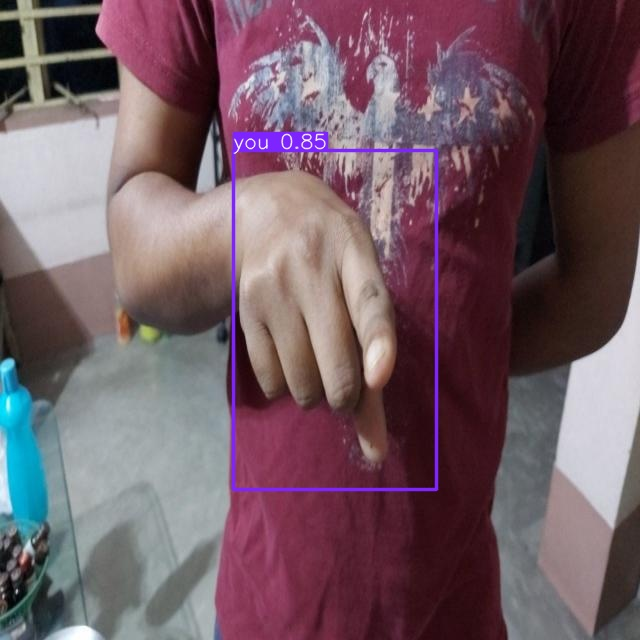

In [25]:
for img_path in glob.glob(f'{Home}/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=img_path, width=500))
  print("\n")

Hyperparameter tuning


In [26]:
%cd {Home}

!yolo task=detect mode=train model={Home}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml epochs=100 imgsz=960 batch=16 lr0=0.0025 momentum=0.937 weight_decay=0.0005 patience=50 augment=True

/kaggle/working
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/runs/detect/train/weights/best.pt, data=/kaggle/working/datasets/ksl_sign_language_detection-1/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=960, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

In [27]:
!ls {Home}/runs/detect/train2/

args.yaml					   train_batch1.jpg
confusion_matrix_normalized.png			   train_batch2.jpg
confusion_matrix.png				   train_batch7380.jpg
events.out.tfevents.1736699557.0b60a3f3d92f.270.0  train_batch7381.jpg
F1_curve.png					   train_batch7382.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


/kaggle/working


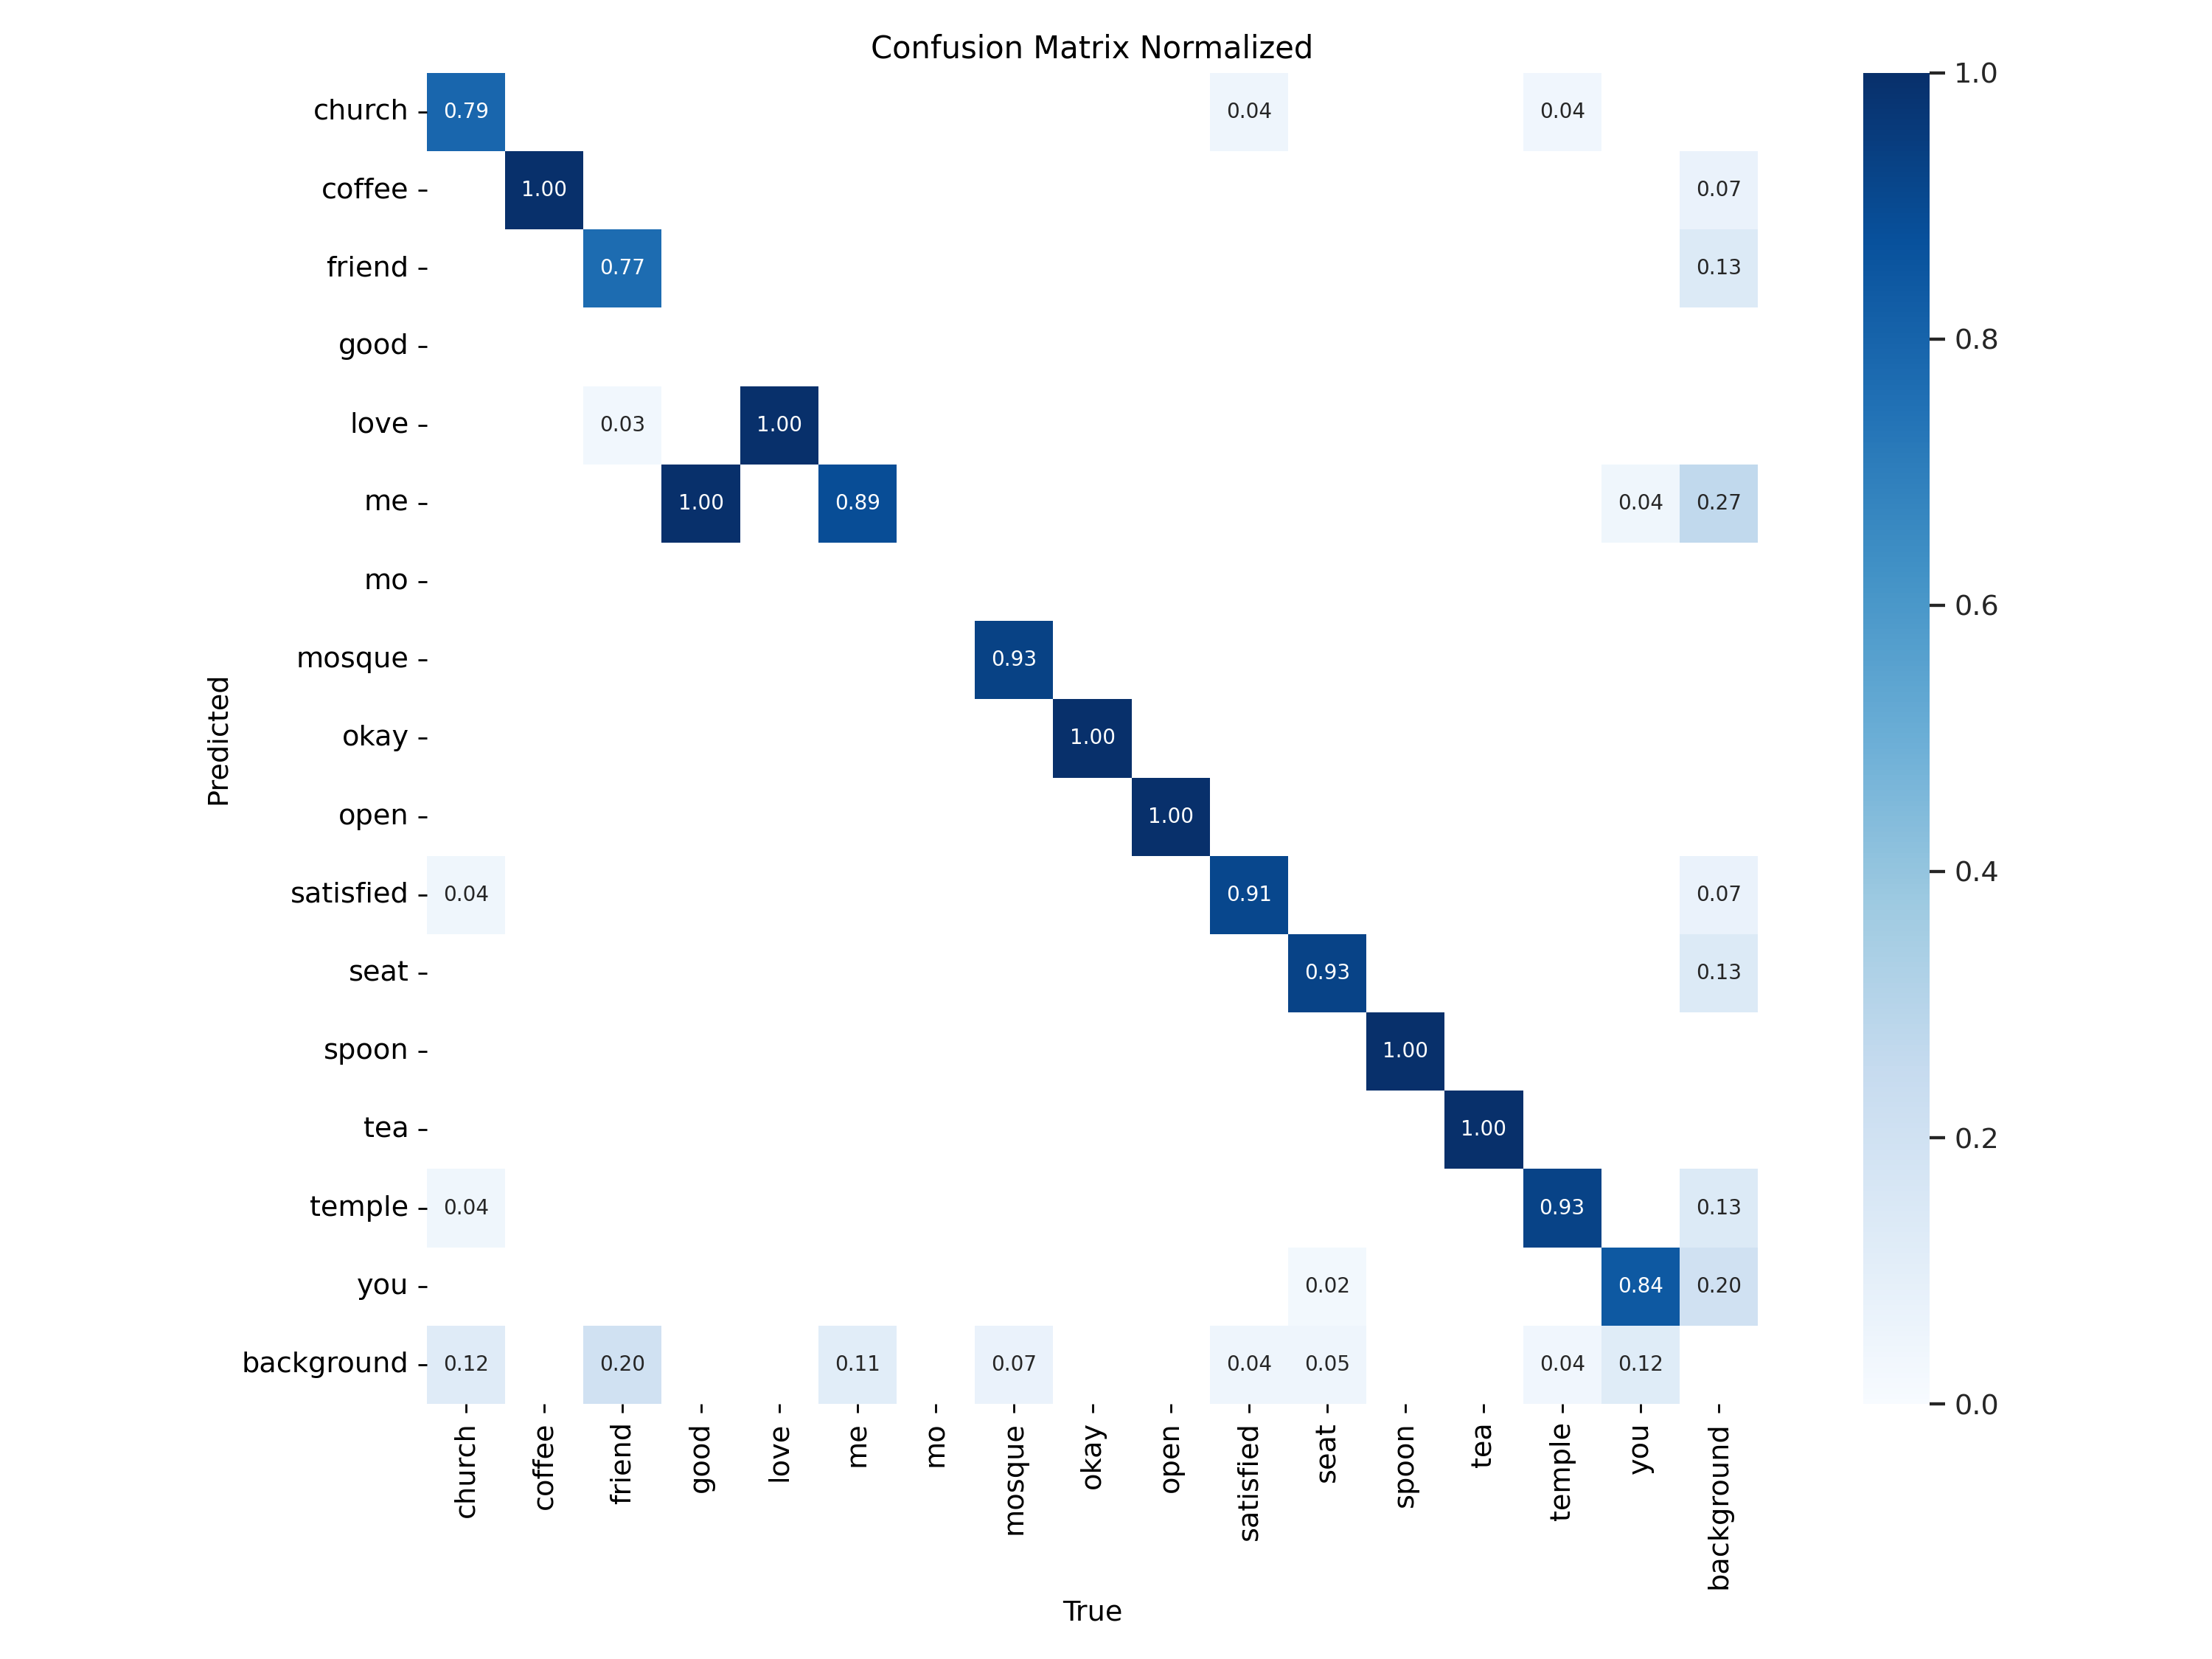

In [29]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train2/confusion_matrix_normalized.png', width=800)

/kaggle/working


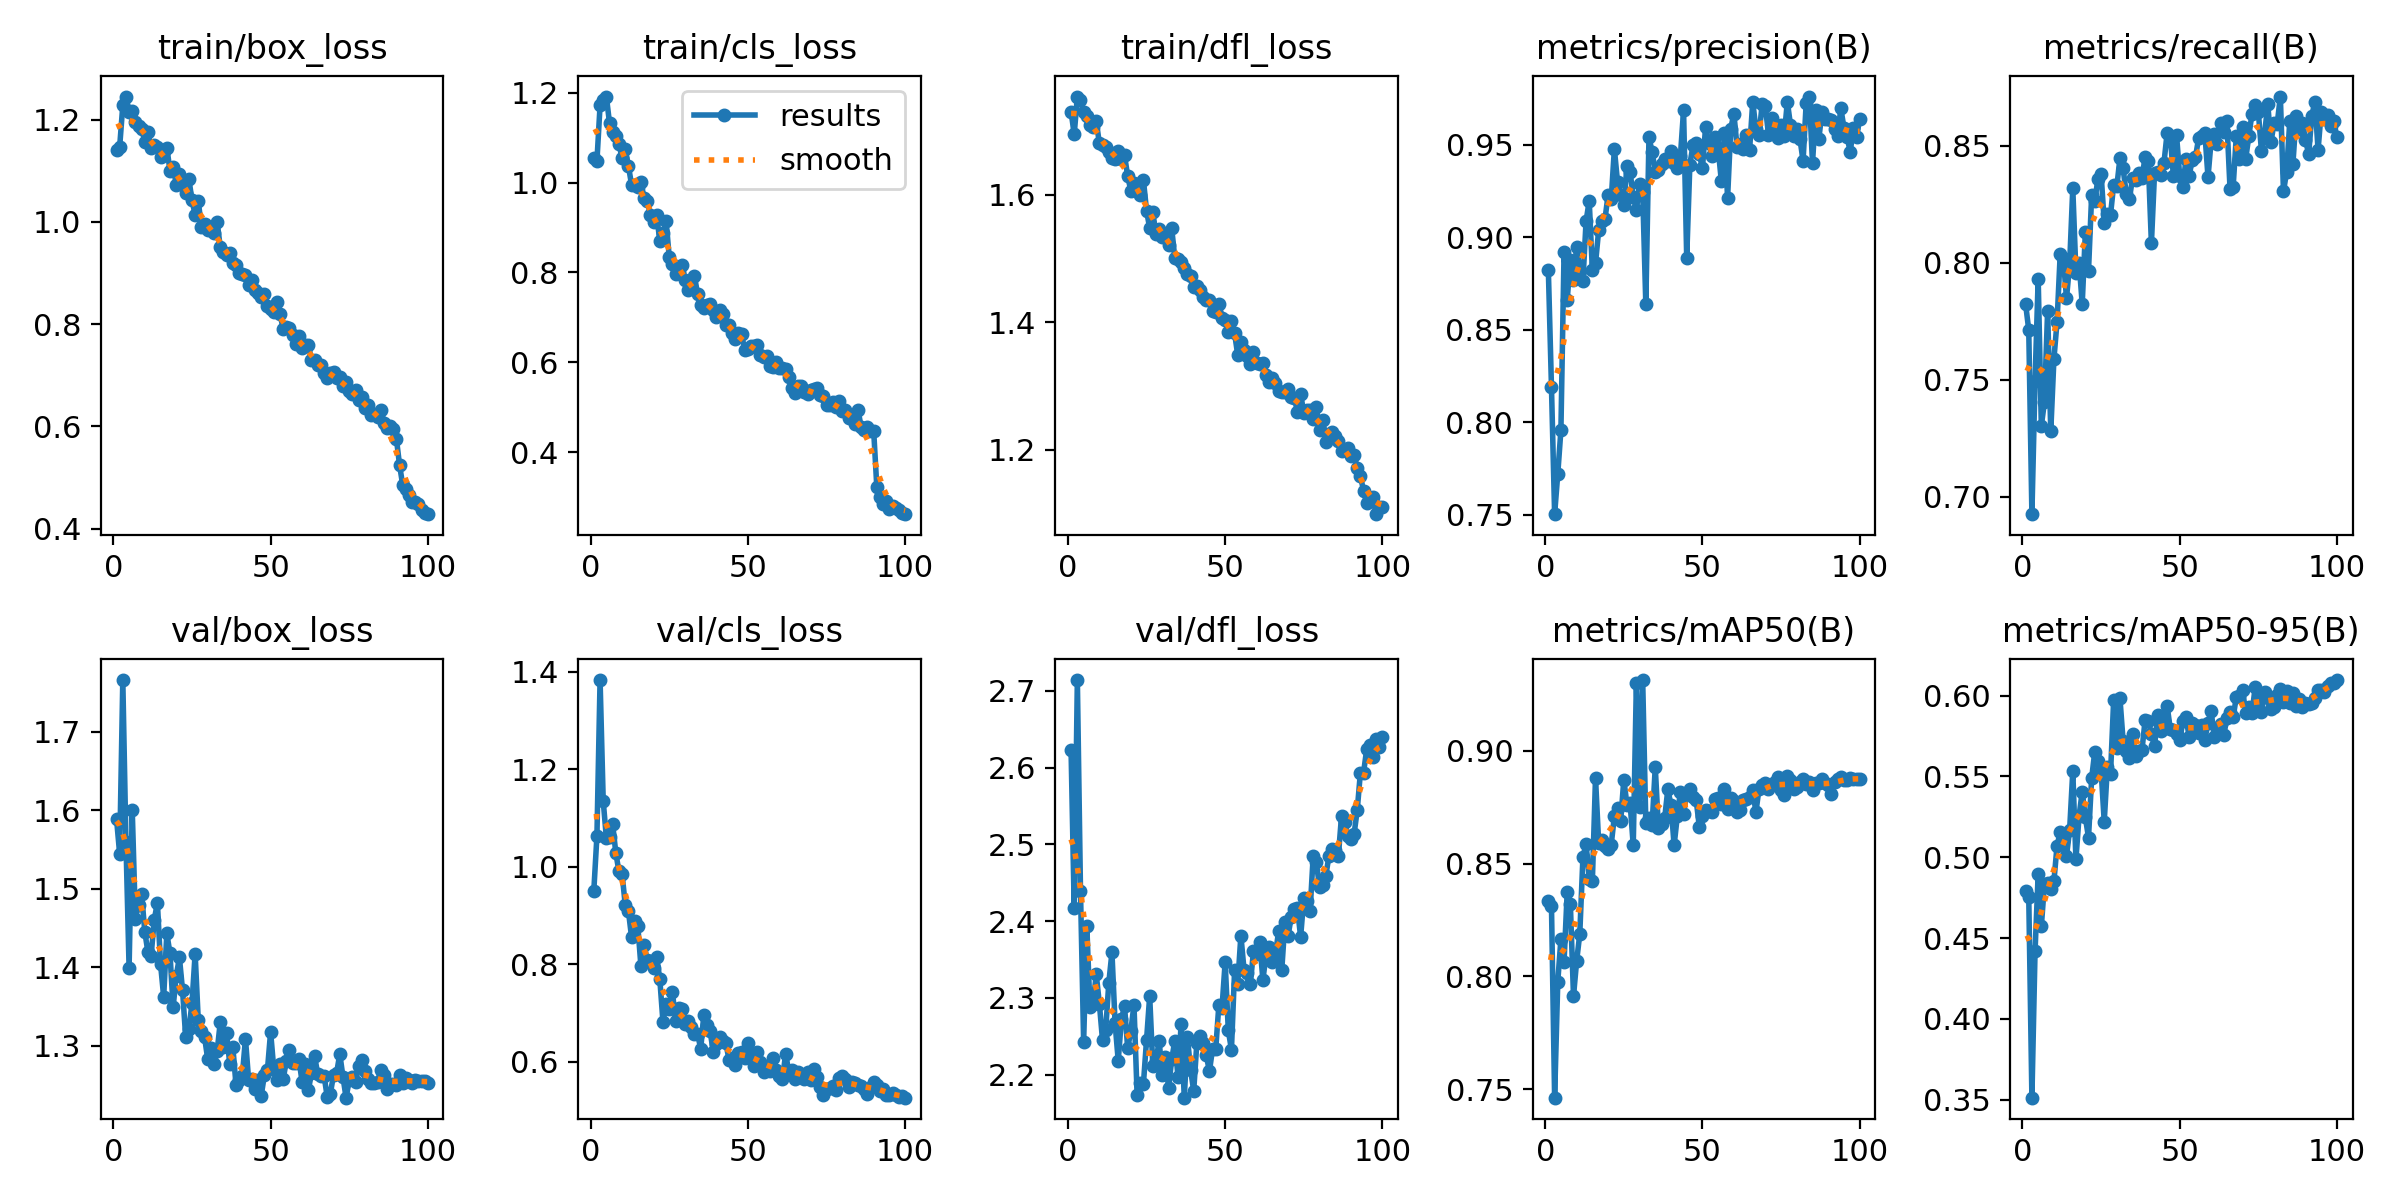

In [30]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train2/results.png', width=800)

/kaggle/working


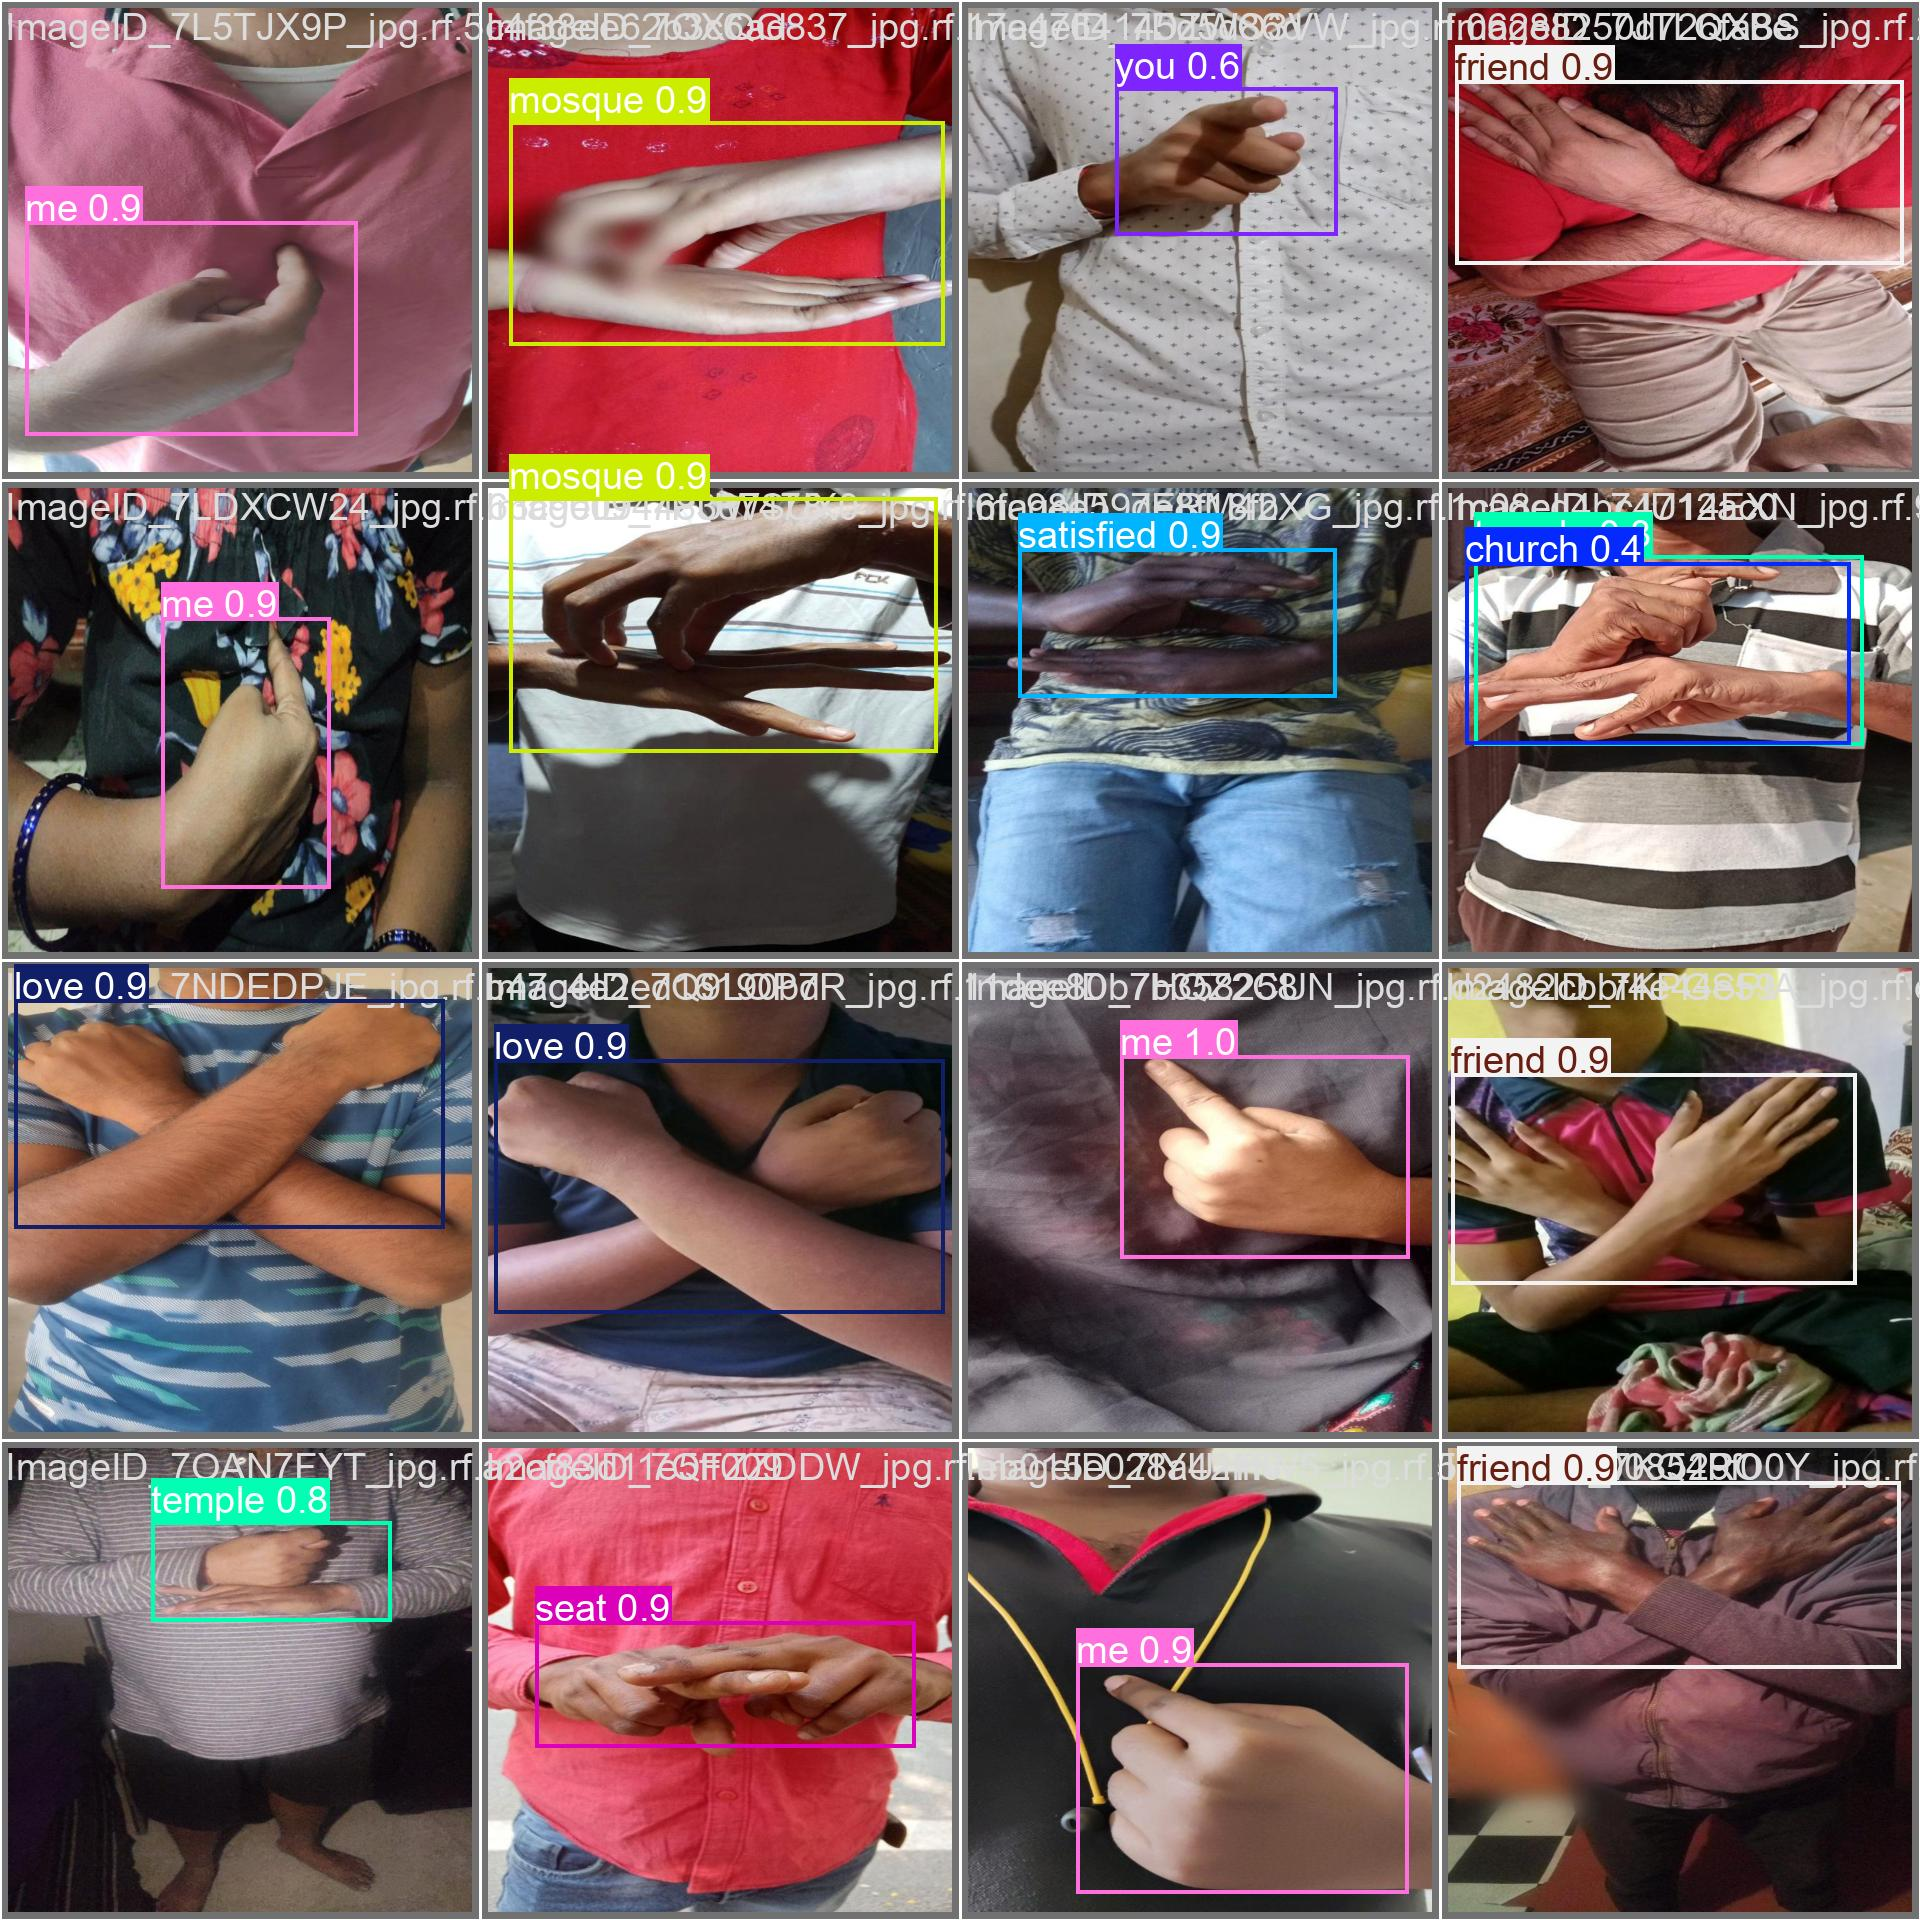

In [42]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [61]:
%cd {Home}

!yolo task=detect mode=predict model={Home}/runs/detect/train/weights/best.pt conf=0.5 source=/kaggle/input/demo-video/demo.mp4

/kaggle/working
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (frame 1/267) /kaggle/input/demo-video/demo.mp4: 480x640 (no detections), 62.3ms
video 1/1 (frame 2/267) /kaggle/input/demo-video/demo.mp4: 480x640 (no detections), 9.4ms
video 1/1 (frame 3/267) /kaggle/input/demo-video/demo.mp4: 480x640 (no detections), 9.2ms
video 1/1 (frame 4/267) /kaggle/input/demo-video/demo.mp4: 480x640 1 you, 9.8ms
video 1/1 (frame 5/267) /kaggle/input/demo-video/demo.mp4: 480x640 (no detections), 8.7ms
video 1/1 (frame 6/267) /kaggle/input/demo-video/demo.mp4: 480x640 (no detections), 8.3ms
video 1/1 (frame 7/267) /kaggle/input/demo-video/demo.mp4: 480x640 (no detections), 6.8ms
video 1/1 (frame 8/267) /kaggle/input/demo-video/demo.mp4: 480x640 (no detections), 6.9ms
video 1/1 (frame 9/267) /kaggle/input/demo-video/demo.mp4: 480x640 1 coffee, 6.9ms
video 1/1 (f

In [64]:
!rm "/kaggle/working/result_compressed.mp4"

rm: cannot remove '/kaggle/working/result_compressed.mp4': No such file or directory


In [65]:
from IPython.display import HTML, display
from base64 import b64encode
import os
import subprocess

path = '/kaggle/working/runs/detect/predict4/demo.avi'
compressed_path = '/kaggle/working/result_compressed.mp4'

result = subprocess.run(['ffmpeg', '-i', path, '-vcodec', 'libx264', compressed_path], 
                        capture_output=True, text=True)

if result.returncode != 0:
    print("Error during video compression:")
    print(result.stderr)  # Print ffmpeg's error message
else:
    # Read and encode the compressed video
    with open(compressed_path, 'rb') as mp4_file:
        mp4_data = mp4_file.read()
    
    # Encode video in base64
    data_url = "data:video/mp4;base64," + b64encode(mp4_data).decode()

    # Display video in notebook
    display(HTML(f"""<video width=400 controls><source src="{data_url}" type="video/mp4"></video>"""))

